In [1]:
from transformers import pipeline
from PIL import Image

/Users/scampione/anaconda3/envs/MSDS2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
checkpoint = "openai/clip-vit-large-patch14"
detector = pipeline(model=checkpoint, task="zero-shot-image-classification")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


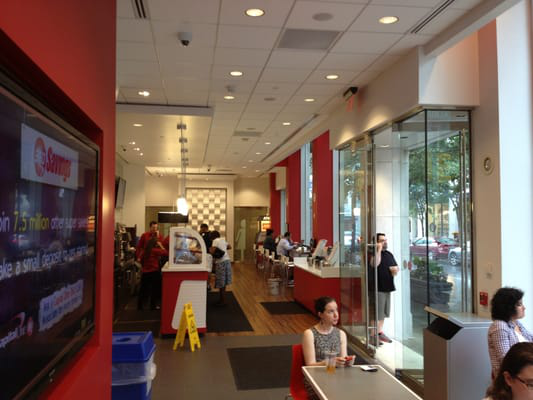

In [9]:
image1 = Image.open('/Users/scampione/MSDS/Spring_24_2/Entrepreneurship/philly_business_photos/_05DcCQmCP5aGnfCnI4r9Q/tGBn5Bh4y9lwUXgjJQOohg.jpg')
image1

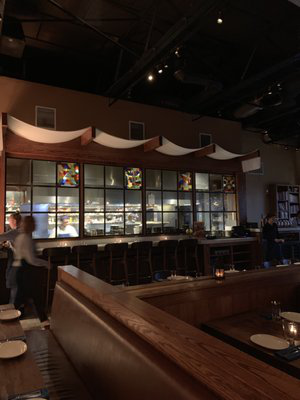

In [11]:
image2 = Image.open('/Users/scampione/MSDS/Spring_24_2/Entrepreneurship/philly_business_photos/ctHjyadbDQAtUFfkcAFEHw/4B42CF8aLwF40vgFe2JW2w.jpg')
image2

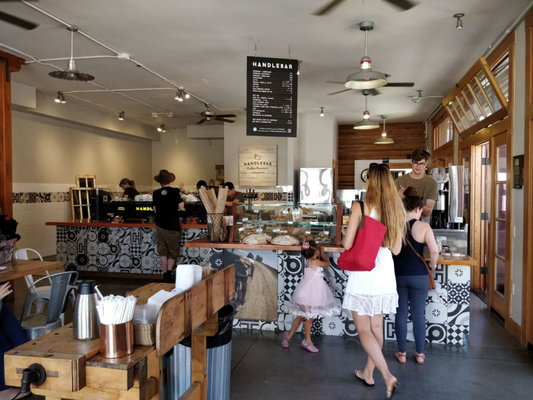

In [13]:
image3 = Image.open('/Users/scampione/MSDS/Spring_24_2/Entrepreneurship/yelp_photos/photos/__2YOQqc906bCe1xy99gMw.jpg')
image3

In [12]:
predictions = detector(image1, candidate_labels=["Brightly lit with natural sunlight",
                                                 "Soft, ambient lighting for cozy atmosphere", 
                                                 "Dimly lit for intimate dining",
                                                 "Bright, artificial lighting"])
predictions

[{'score': 0.4015781879425049,
  'label': 'Soft, ambient lighting for cozy atmosphere'},
 {'score': 0.37965691089630127, 'label': 'Bright, artificial lighting'},
 {'score': 0.14167435467243195, 'label': 'Dimly lit for intimate dining'},
 {'score': 0.07709050923585892, 'label': 'Brightly lit with natural sunlight'}]

In [10]:
predictions = detector(image2, candidate_labels=["Brightly lit with natural sunlight",
                                                 "Soft, ambient lighting for cozy atmosphere", 
                                                 "Dimly lit for intimate dining",
                                                 "Bright, artificial lighting"])
predictions

[{'score': 0.9137876629829407, 'label': 'Dimly lit for intimate dining'},
 {'score': 0.08205568790435791,
  'label': 'Soft, ambient lighting for cozy atmosphere'},
 {'score': 0.0025234585627913475, 'label': 'Bright, artificial lighting'},
 {'score': 0.0016333091771230102,
  'label': 'Brightly lit with natural sunlight'}]

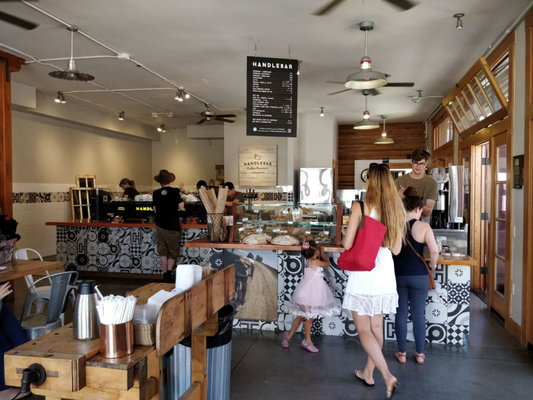

In [25]:
image3

In [26]:
predictions1 = detector(image3, candidate_labels=["Brightly lit with natural sunlight",
                                                 "Soft, ambient lighting for cozy atmosphere", 
                                                 "Dimly lit for intimate dining",
                                                 "Bright, artificial lighting"])


predictions2 = detector(image3, candidate_labels=["Modern and sleek with metallic finishes",
                                                 "Rustic charm with wooden accents", 
                                                 "Vintage decor with antique furnishings",
                                                 "Eclectic mix of colors and patterns",
                                                 "Elegant, minimalist decor"])


predictions3 = detector(image3, candidate_labels=["Open and airy layout", 
                                                 "Cozy, intimate seating arrangements",
                                                 "Outdoor dining area",
                                                 "Multi-level dining spaces",
                                                 "Partitioned spaces for private dining"])


predictions4 = detector(image3, candidate_labels=["Lush green plants and natural elements",
                                                  "Artistic displays and wall art",
                                                  "Use of vibrant textiles and upholstery",
                                                  "Unique or thematic furniture pieces"
                                                  "Presence of water features (fountains, aquariums)"])

for p in predictions1:
    print(p)

print('\n')
for p in predictions2:
    print(p)

print('\n')
for p in predictions3:
    print(p)

print('\n')
for p in predictions4:
    print(p)

{'score': 0.5189765691757202, 'label': 'Soft, ambient lighting for cozy atmosphere'}
{'score': 0.2204355001449585, 'label': 'Dimly lit for intimate dining'}
{'score': 0.1366538256406784, 'label': 'Bright, artificial lighting'}
{'score': 0.12393409013748169, 'label': 'Brightly lit with natural sunlight'}


{'score': 0.3697826564311981, 'label': 'Modern and sleek with metallic finishes'}
{'score': 0.17943188548088074, 'label': 'Rustic charm with wooden accents'}
{'score': 0.16923458874225616, 'label': 'Elegant, minimalist decor'}
{'score': 0.15790021419525146, 'label': 'Eclectic mix of colors and patterns'}
{'score': 0.12365064769983292, 'label': 'Vintage decor with antique furnishings'}


{'score': 0.8718832731246948, 'label': 'Open and airy layout'}
{'score': 0.08259230107069016, 'label': 'Multi-level dining spaces'}
{'score': 0.02299295924603939, 'label': 'Outdoor dining area'}
{'score': 0.012898348271846771, 'label': 'Cozy, intimate seating arrangements'}
{'score': 0.0096331844106316

In [6]:
predictions = detector(image1, candidate_labels=["coworking cafe", "casual", "open and airy layout"])
predictions

[{'score': 0.8020546436309814, 'label': 'coworking cafe'},
 {'score': 0.19669219851493835, 'label': 'open and airy layout'},
 {'score': 0.0012531308457255363, 'label': 'casual'}]

In [13]:
predictions = detector(image1, candidate_labels=["quick bite", "elegant", "rustic"])
predictions

[{'score': 0.9717339277267456, 'label': 'quick bite'},
 {'score': 0.017558429390192032, 'label': 'elegant'},
 {'score': 0.010707692243158817, 'label': 'rustic'}]

In [10]:
predictions = detector(image1, candidate_labels=["special occassion", "Coworking Cafe", 'Quick Lunch', 'Healthy/Detox', 'Brunch', 'Rooftop'])
predictions

[{'score': 0.9786091446876526, 'label': 'Coworking Cafe'},
 {'score': 0.010689753107726574, 'label': 'Quick Lunch'},
 {'score': 0.007115887477993965, 'label': 'special occassion'},
 {'score': 0.0017142355209216475, 'label': 'Healthy/Detox'},
 {'score': 0.0014876289060339332, 'label': 'Brunch'},
 {'score': 0.00038340335595421493, 'label': 'Rooftop'}]

# Reviews Classification

In [14]:
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")

In [18]:
sequence_to_classify = "date night with girlfriend here was perfect. i wouldn't say im so much a foodie but i love to eat good food. 9:45 reservation, walked right to our table. exceptional service from start to finish. jeff was our server he was great. we both did the 39 plan and we started with humus tahani and the most amazing phenomenal soft warm pita bread. next we each chose 2 small plates fried broccoli, cucumber and yogurt, short rips and potatoes which melted in my mouth, and chicken pastilla! they were perfect and filling. they also served us side mediterterannean salad items carrots, zucchini, etc lamb and beef kofte followed these. incredible and the most amazing flourless frozen almond chocolate cake and some kind of amazing ice cream.... well basically, im a 25 year old student and it was a pleasure spending 122 on a fantastic meal in an incredible atmosphere with a pretty ambiance with above average service. would most definitely recommend"
candidate_labels = ['good ambience', 'no ambience', 'luxury dining', 'casual dining']

In [24]:
d = classifier(sequence_to_classify, candidate_labels, multi_label=True)

In [28]:
for label, score in zip(d['labels'], d['scores']):
    print(f'{label}: {round(score, 5)}')

good ambience: 0.99195
luxury dining: 0.86425
casual dining: 0.80771
no ambience: 0.00027


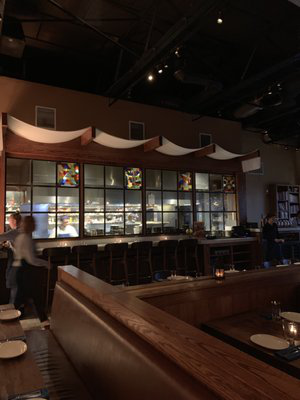

In [29]:
Image.open('/Users/scampione/MSDS/Spring_24_2/Entrepreneurship/philly_business_photos/ctHjyadbDQAtUFfkcAFEHw/4B42CF8aLwF40vgFe2JW2w.jpg')